# 基于 LeNet 的 FashionMNIST 数据集的分类
## LeNet
### 基本框架：
LeNet 主要由两个部分组成：
- 卷积层
- 全连接层

其基本机构如下：

输入：图片（$28\times 28$）
- $5\times 5$ 卷积层（6），填充为 2 （6@28*28）
- Sigmoid 函数激活
- $2\times 2$ 平均汇聚层，步幅为 2 （6@14*14）
- $5\times 5$ 卷积层（16） （16@10*10）
- Sigmoid 函数激活
- $2\times 2$ 平均汇聚层，步幅为 2 （16@5*5）
- Flatten 展平
- 全连接层（16\*5*5,120）
- Sigmoid 函数激活
- 全连接层（120，84）
- Sigmoid 函数激活
- 全连接层（84，10）
- softmax 函数分类输出

输出：10 个类别样本

In [1]:
# imports
import basic
from torch import nn
from torch import optim


class LeNet(basic.Net):
    def __init__(self):
        super(basic.Net).__init__()
        self.lenet()
    
    def lenet(self):
        self.net = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Conv2d(6,16,kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Flatten(),
            nn.Linear(16*5*5, 120),
            nn.Sigmoid(),
            nn.Linear(120,84),
            nn.Sigmoid(),
            nn.Linear(84,10))

['bag', 'sandal', 'sneaker', 'pullover']


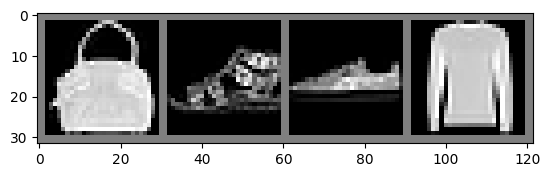

In [5]:
ROOT = "./data"
BatchSize = 128
optimizer = optim.SGD
criterion = nn.CrossEntropyLoss()

trains, tests, labels = basic.load_FashionMNIST_datasets(BatchSize,28,ROOT)
basic.show_some_samples(trains,labels)

In [6]:
lenet = LeNet()
lenet.train(trains,criterion,optimizer,epochs=5)
lenet.accuracy(tests)
lenet.label_accuracy(tests,labels)

Training on!


 20%|██        | 1/5 [00:05<00:21,  5.33s/it]

epoch 1, avg_loss: 2.3139074913456907


 40%|████      | 2/5 [00:10<00:15,  5.29s/it]

epoch 2, avg_loss: 2.3022346236766915


 60%|██████    | 3/5 [00:15<00:10,  5.34s/it]

epoch 3, avg_loss: 1.8250295135200534


 80%|████████  | 4/5 [00:21<00:05,  5.32s/it]

epoch 4, avg_loss: 1.1351209117306604


100%|██████████| 5/5 [00:26<00:00,  5.31s/it]

epoch 5, avg_loss: 0.9403687114389534
Finish Training!


Total Accuracy:  67.32
Accuracy of t-shirt : 72 %
Accuracy of trouser : 85 %
Accuracy of pullover : 60 %
Accuracy of dress : 56 %
Accuracy of  coat : 56 %
Accuracy of sandal : 68 %
Accuracy of shirt :  8 %
Accuracy of sneaker : 82 %
Accuracy of   bag : 88 %
Accuracy of ankle boot : 92 %
[726.0, 859.0, 603.0, 569.0, 565.0, 686.0, 82.0, 826.0, 887.0, 929.0]
[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]
